# Project 3: Web APIs & Classification - Reddit

### Contents:
- [Package Imports](#Package-Imports)
- [Preliminary Run Through to Make Sure Code Works for Reddit Scraping](#Preliminary-Run-Through-to-Make-Sure-Code-Works-for-Reddit-Scraping)
- [Gather Posts from r/science](#Gather-Posts-from-r/science)
- [Gather Posts from r/Art](#Gather-Posts-from-r/Art)
- [Combine and Convert the CSV Files into a DataFrame](#Combine-and-Convert-the-CSV-Files-into-a-DataFrame)
- [Gather Comments from r/science](#Gather-Comments-from-r/science)
- [Gather Comments from r/Art](#Gather-Comments-from-r/Art)
- [Load Dataset](#Load-Dataset)
- [Calculate Baseline Accuracy and Text Count by Subreddit](#Calculate-Baseline-Accuracy-and-Text-Count-by-Subreddit)
- [Create a Lemmatizer Function](#Create-a-Lemmatizer-Function)
- [Add to the Stop Words List](#Add-to-the-Stop-Words-List)
- [Create a CountVectorizer Naive Bayes Pipeline](#Create-a-CountVectorizer-Naive-Bayes-Pipeline)
- [Create a CountVectorizer Logistic Regression Pipeline](#Create-a-CountVectorizer-Logistic-Regression-Pipeline)
- [Create a TFIDFVectorizer Logistic Regression Pipeline](#Create-a-TFIDFVectorizer-Logistic-Regression-Pipeline)
- [Exploration of Features](#Exploration-of-Features)
- [Confusion Matrix and Error Metrics](#Confusion-Matrix-and-Error-Metrics)
- [Conclusion](#Conclusion)

### Package Imports

In [1]:
import pandas as pd
import requests
import time
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Turn off warnings
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Code to display all the columns and rows
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

### Preliminary Run Through to Make Sure Code Works for Reddit Scraping

In [3]:
# Create a custom user-agent for Reddit access request
user = {'User-agent': 'Chairman Mao'}

# Create url to grab data
url_1 = 'https://www.reddit.com/r/science.json'

In [4]:
# Pull json from Reddit
res_1 = requests.get(url_1, headers = user)

In [5]:
# Check the status of the link, looking for 200 = ok
res_1.status_code

200

In [6]:
# Convert the json into a dictionary
json_data = res_1.json()

In [7]:
# Check the dictionary
# json_data

In [8]:
json_data.keys()

dict_keys(['kind', 'data'])

In [9]:
sorted(json_data['data'].keys())

['after', 'before', 'children', 'dist', 'modhash']

In [10]:
len(json_data['data']['children'])

25

In [11]:
pd.DataFrame(json_data['data']['children'])

,data,kind
0,"{'approved_at_utc': None, 'subreddit': 'scienc...",t3
1,"{'approved_at_utc': None, 'subreddit': 'scienc...",t3
2,"{'approved_at_utc': None, 'subreddit': 'scienc...",t3
3,"{'approved_at_utc': None, 'subreddit': 'scienc...",t3
4,"{'approved_at_utc': None, 'subreddit': 'scienc...",t3
5,"{'approved_at_utc': None, 'subreddit': 'scienc...",t3
6,"{'approved_at_utc': None, 'subreddit': 'scienc...",t3
7,"{'approved_at_utc': None, 'subreddit': 'scienc...",t3
8,"{'approved_at_utc': None, 'subreddit': 'scienc...",t3
9,"{'approved_at_utc': None, 'subreddit': 'scienc...",t3


In [12]:
json_data['data']['children'][0]

{'kind': 't3',
 'data': {'approved_at_utc': None,
  'subreddit': 'science',
  'selftext': '',
  'author_fullname': 't2_65vch',
  'saved': False,
  'mod_reason_title': None,
  'gilded': 1,
  'clicked': False,
  'title': 'New drug-delivery system disguises chemotherapy drugs as fat, fooling quick-growing and hungry tumor cells that consume the nutrients much faster than normal cells. The drug then activates, suppressing tumor growth. The drug also is lower in toxicity than current drugs, leading to fewer side effects',
  'link_flair_richtext': [],
  'subreddit_name_prefixed': 'r/science',
  'hidden': False,
  'pwls': 6,
  'link_flair_css_class': 'cancer',
  'downs': 0,
  'thumbnail_height': 78,
  'hide_score': False,
  'name': 't3_cf9azm',
  'quarantine': False,
  'link_flair_text_color': 'light',
  'author_flair_background_color': None,
  'subreddit_type': 'public',
  'ups': 76322,
  'total_awards_received': 5,
  'media_embed': {},
  'thumbnail_width': 140,
  'author_flair_template_id':

In [13]:
json_data['data']['after']

't3_cfgpma'

In [14]:
# [post['data']['name'] for post in json_data['data']['children']]

In [15]:
param = {'after' : json_data['data']['after']}

In [16]:
requests.get(url_1, params = param, headers = user)

<Response [200]>

### Gather Posts from r/science

### Gather Posts from r/Art

### Combine and Convert the CSV Files into a DataFrame

In [17]:
# Combine the csv files for science
df_sci_1 = pd.read_csv('./datasets/posts_science_1.csv')
df_sci_2 = pd.read_csv('./datasets/posts_science_2.csv')
df_sci_3 = pd.read_csv('./datasets/posts_science_3.csv')

df_sci = pd.concat([df_sci_1, df_sci_2, df_sci_3])

df_sci.shape

(4206, 2)

In [18]:
# Combine the csv files for art
df_art_1 = pd.read_csv('./datasets/posts_art_1.csv')
df_art_2 = pd.read_csv('./datasets/posts_art_2.csv')
df_art_3 = pd.read_csv('./datasets/posts_art_3.csv')
df_art_4 = pd.read_csv('./datasets/posts_art_4.csv')
df_art = pd.concat([df_art_1, df_art_2, df_art_3, df_art_4])

df_art.shape

(4877, 2)

In [19]:
# Reset the index for both the dataframes for art and science
df_sci.reset_index(inplace=True)
df_art.reset_index(inplace=True)

In [20]:
# Save the combined dataframes to csv files
df_sci.to_csv('./datasets/posts_science.csv', index=False)
df_art.to_csv('./datasets/posts_art.csv', index=False)

In [21]:
# Drop the duplicates for the science and art
df_sci.drop_duplicates(subset='data', inplace=True)
df_art.drop_duplicates(subset='data', inplace=True)

In [22]:
df_sci.shape

(4165, 3)

In [23]:
df_art.shape

(4877, 3)

In [24]:
# Learned how to extract a dictionary from a string from 
# https://stackoverflow.com/questions/39807724/extract-python-dictionary-from-string
import re
import ast
df_sci['data_dict'] = [ast.literal_eval(re.search('({.+})', i).group(0)) for i in df_sci['data']]
df_art['data_dict'] = [ast.literal_eval(re.search('({.+})', i).group(0)) for i in df_art['data']]

In [25]:
df_art.head().T

,0,1,2,3,4
index,0,1,2,3,4
data,"{'approved_at_utc': None, 'subreddit': 'Art', ...","{'approved_at_utc': None, 'subreddit': 'Art', ...","{'approved_at_utc': None, 'subreddit': 'Art', ...","{'approved_at_utc': None, 'subreddit': 'Art', ...","{'approved_at_utc': None, 'subreddit': 'Art', ..."
kind,t3,t3,t3,t3,t3
data_dict,"{'approved_at_utc': None, 'subreddit': 'Art', ...","{'approved_at_utc': None, 'subreddit': 'Art', ...","{'approved_at_utc': None, 'subreddit': 'Art', ...","{'approved_at_utc': None, 'subreddit': 'Art', ...","{'approved_at_utc': None, 'subreddit': 'Art', ..."


In [26]:
# Bobby showed me how to make a DataFrame out of the json dictionaries
df_sci = df_sci['data_dict'].apply(pd.Series)
df_art = df_art['data_dict'].apply(pd.Series)

In [27]:
# Drop duplicate posts
df_art.drop_duplicates(subset='name', inplace=True)

In [28]:
# Drop duplicate posts
df_sci.drop_duplicates(subset='name', inplace=True)

In [29]:
df_art.shape

(1649, 105)

In [30]:
df_sci.shape

(1017, 104)

In [31]:
# Create a column in each DataFrame to indicate whether it's from r/science (1) or r/Art (0)
df_sci['science'] = 1
df_art['science'] = 0

In [32]:
# Combine the DataFrames for science and Art into one
df_sci_art = pd.concat([df_sci, df_art])
df_sci_art.reset_index(inplace=True)

In [33]:
# Create a column with the post title and selftext
df_sci_art['text'] = df_sci_art['title'] + " -- " + df_sci_art['selftext']

In [34]:
# Create a column with the text count
df_sci_art['text_count'] = [len(df_sci_art['text'][s].split()) for s in range(len(df_sci_art['text']))]

In [35]:
df_sci_art.drop(columns='index', inplace=True)

In [36]:
df_sci_art.head(1).T

,0
all_awardings,"[{'is_enabled': True, 'count': 4, 'subreddit_i..."
allow_live_comments,True
approved_at_utc,None
approved_by,None
archived,True
author,ScienceModerator
author_cakeday,True
author_flair_background_color,None
author_flair_css_class,None
author_flair_richtext,[]


In [37]:
df_sci_art.to_csv('./datasets/final_posts_art_sci.csv', index=False)

### Gather Comments from r/science

### Gather Comments from r/Art

### Load Dataset 

In [38]:
X = df_sci_art['text']
y = df_sci_art['science']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### Calculate Baseline Accuracy and Text Count by Subreddit

In [39]:
# Calculate the baseline accuracy
1-y.mean()

0.618529632408102

In [40]:
# Find the average text count for science and Art
print(f"Average Text Count in r/science: {round(df_sci_art[df_sci_art['science'] == 1]['text_count'].mean(), 0)}")
print(f"Average Text Count in r/Art: {round(df_sci_art[df_sci_art['science'] == 0]['text_count'].mean(), 0)}")     

Average Text Count in r/science: 36.0
Average Text Count in r/Art: 8.0


''

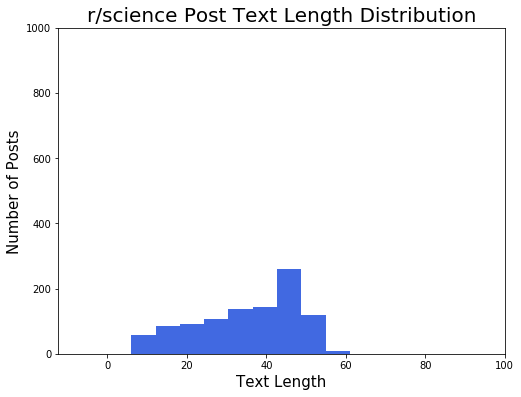

In [128]:
# Create a histogram of the post text length for r/science
plt.figure(figsize=(8, 6))
plt.hist(df_sci_art[df_sci_art['science'] == 1]['text_count'], bins=60, color='royalblue')
plt.title("r/science Post Text Length Distribution", fontsize = 20)
plt.ylabel("Number of Posts", fontsize = 15)
plt.xlabel("Text Length", fontsize = 15)
plt.xlim(right=100)
plt.ylim(top=1000)
;

''

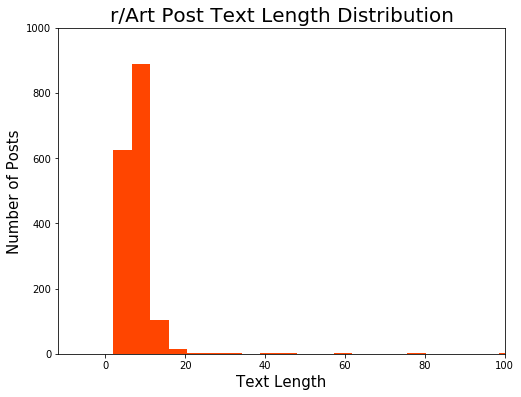

In [130]:
# Create a histogram of the post text length for r/Art
plt.figure(figsize=(8, 6))
plt.hist(df_sci_art[df_sci_art['science'] == 0]['text_count'], bins=60, color='orangered')
plt.title("r/Art Post Text Length Distribution", fontsize = 20)
plt.ylabel("Number of Posts", fontsize = 15)
plt.xlabel("Text Length", fontsize = 15)
plt.xlim(right=100)
plt.ylim(top=1000)
;

<div class="alert alert-block alert-info">
I intentionally included more posts for r/Art than r/science since the posts from r/science contained more text (average of 36 words per post), whereas r/Art posts usually only have titles (average of 8 words per post). As you can see from the graphs above, the majority of the r/Art posts have less than 20 words per post, while the r/science posts are spread all the way up to 60 words per post. I set the max limit of the x-axis at 100 even though there are posts with more than 100 words, so that visually the plots don't have too much white space. The max limit of the y-axis was set to 1,000 so that the two subreddits are on the same scale.
<br>

Therefore, my classes are unbalanced with 61.9% of the data coming from r/Art (1,649 posts), and 38% coming from r/science (1,017). Baseline accuracy for the dataset is set at 61.9%.
</div>

### Create a Lemmatizer Function

In [43]:
# Found an article on how to use a Lemmatizer function within CountVectorizer at 
# https://towardsdatascience.com/hacking-scikit-learns-vectorizers-9ef26a7170af
import spacy

# Create a spaCy tokenizer
spacy.load('en_core_web_sm')
lemmatizer = spacy.lang.en.English()

# tokenize the doc and lemmatize its tokens
def my_tokenizer(doc):
    tokens = lemmatizer(doc)
    return([token.lemma_ for token in tokens])

<div class="alert alert-block alert-info">
I created a Lemmatizer function to pass through the CountVectorizer transformation in case tokenizing the text would generate better results by tallying the roots of the words.
</div>

### Add to the Stop Words List

In [44]:
# Found a post on how to add to the stop words list 
# https://stackoverflow.com/questions/24386489/adding-words-to-scikit-learns-countvectorizers-stop-list
from sklearn.feature_extraction import text 

In [45]:
stop_words = text.ENGLISH_STOP_WORDS

In [46]:
stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [47]:
stop_words = text.ENGLISH_STOP_WORDS.union('science', 'art', '"', ',', '-', '.', '(', ')', '--')

<div class="alert alert-block alert-info">
I wanted to add words that make the categorization of posts too easy to the list of default english stop words.
</div>

### Create a CountVectorizer Naive Bayes Pipeline

<div class="alert alert-block alert-info">
Since the X variables are the count of words in posts with CountVectorization, the features are positive integer variables. The Multinomial Naive Bayes model should be used since that model is appropriate when the features are variables that take on only positive integer counts.
</div>

In [48]:
# Import the Multinomial Naive Bayes model for the CountVectorizer transformation 
from sklearn.naive_bayes import MultinomialNB

In [49]:
# Create pipeline with CountVectorizer and MultinomialNB model
pipe_cv_mnb = Pipeline([('cvec', CountVectorizer()), ('mnb', MultinomialNB())])

In [50]:
# Create the hyperparameters for CountVectorizer
pipe_cv_params = {
    'cvec__max_features': [1000, 2000, 3000, 4000],
    'cvec__stop_words'  : [stop_words],
    'cvec__ngram_range' : [(1,1), (1,2), (1,3)],
    'cvec__min_df'      : [2],
    'cvec__tokenizer'   : [None, my_tokenizer]
}

In [51]:
# Use GridSearchCV to find the best parameters for CountVectorizer and MultinomialNB
gs = GridSearchCV(pipe_cv_mnb, param_grid=pipe_cv_params, cv=3, verbose=0)
gs.fit(X_train, y_train)
print(gs.best_score_)
cv_mnb_best_params = gs.best_params_
gs.best_params_

C:\Users\tengw\Anaconda3\envs\dsi\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\tengw\Anaconda3\envs\dsi\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\tengw\Anaconda3\envs\dsi\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\tengw\Anaconda3\envs\dsi\lib\site-pac

C:\Users\tengw\Anaconda3\envs\dsi\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\tengw\Anaconda3\envs\dsi\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\tengw\Anaconda3\envs\dsi\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\tengw\Anaconda3\envs\dsi\lib\site-pac

0.9919959979989995


{'cvec__max_features': 2000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': frozenset({'"',
            '(',
            ')',
            ',',
            '-',
            '.',
            'a',
            'about',
            'above',
            'across',
            'after',
            'afterwards',
            'again',
            'against',
            'all',
            'almost',
            'alone',
            'along',
            'already',
            'also',
            'although',
            'always',
            'am',
            'among',
            'amongst',
            'amoungst',
            'amount',
            'an',
            'and',
            'another',
            'any',
            'anyhow',
            'anyone',
            'anything',
            'anyway',
            'anywhere',
            'are',
            'around',
            'as',
            'at',
            'back',
            'be',
            'became',
            'beca

In [52]:
pipe_cv_mnb = Pipeline([('cvec', CountVectorizer(
                                                max_features=2000,
                                                min_df = 2,
                                                ngram_range = (1,1),
                                                tokenizer = my_tokenizer,
                                                stop_words = stop_words
                                                )), ('mnb', MultinomialNB())])
pipe_cv_mnb.fit(X_train, y_train)

C:\Users\tengw\Anaconda3\envs\dsi\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=2000, min_df=2,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=frozenset({'"', '(', ')', ',', '-',
                                                       '.', 'a', 'about',
                                                       'above', 'across',
                                                       'after', 'afterwards',
                                                       'a...gainst',
                                                       'all', 'almost', 'alone',
                                                       'along', 'already',
          

In [53]:
pipe_cv_mnb.score(X_train, y_train)

0.9959979989994997

In [54]:
pipe_cv_mnb.score(X_test, y_test)

0.9940029985007496

<div class="alert alert-block alert-info">
After putting the data through a pipeline with a CountVectorizer and a Multinomial Naive Bayes model, the GridSearchCV generated the optimal parameters for the CountVectorizer. I started with 100-500 max_features, but the parameters bumped up against the high range, so I tried increasing the feature number until the GridSearch no longer picked the highest number of features. I set min_df at 2 so that rare words that occured in only one post would be excluded. Stop_words were excluded from the transformation to reduce noise on the data.   
<br>    
    
The optimal parameters for the pipeline generated an accuracy score of 99.6% on the train data and 99.4% on the test data. This exceeds the baseline accuracy of 61.9%.
</div>

### Create a CountVectorizer Logistic Regression Pipeline

In [55]:
# Create the Pipeline for the models
pipe_cv_lg = Pipeline([('cvec', CountVectorizer()), ('lg', LogisticRegression())])
pipe_tv_lg = Pipeline([('tvec', TfidfVectorizer()), ('lg', LogisticRegression())])

In [56]:
# Use GridSearchCV to find the best parameters for CountVectorizer and Logistic Regression
gs_cv_lg = GridSearchCV(pipe_cv_lg, param_grid=pipe_cv_params, cv=3, verbose=0)
gs_cv_lg.fit(X_train, y_train)
print(gs_cv_lg.best_score_)
cv_lg_best_params = gs_cv_lg.best_params_
gs_cv_lg.best_params_

C:\Users\tengw\Anaconda3\envs\dsi\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\tengw\Anaconda3\envs\dsi\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\tengw\Anaconda3\envs\dsi\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\tengw\Anaconda3\envs\dsi\lib\site-pac

C:\Users\tengw\Anaconda3\envs\dsi\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\tengw\Anaconda3\envs\dsi\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\tengw\Anaconda3\envs\dsi\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\tengw\Anaconda3\envs\dsi\lib\site-pac

0.9804902451225613


{'cvec__max_features': 2000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': frozenset({'"',
            '(',
            ')',
            ',',
            '-',
            '.',
            'a',
            'about',
            'above',
            'across',
            'after',
            'afterwards',
            'again',
            'against',
            'all',
            'almost',
            'alone',
            'along',
            'already',
            'also',
            'although',
            'always',
            'am',
            'among',
            'amongst',
            'amoungst',
            'amount',
            'an',
            'and',
            'another',
            'any',
            'anyhow',
            'anyone',
            'anything',
            'anyway',
            'anywhere',
            'are',
            'around',
            'as',
            'at',
            'back',
            'be',
            'became',
            'beca

In [57]:
pipe_cv_lg = Pipeline([('cvec', CountVectorizer(
                                                max_features=2000,
                                                min_df = 2,
                                                ngram_range = (1,3),
                                                tokenizer = my_tokenizer,
                                                stop_words = stop_words
                                                )), ('lg', LogisticRegression())])
pipe_cv_lg.fit(X_train, y_train)

C:\Users\tengw\Anaconda3\envs\dsi\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=2000, min_df=2,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words=frozenset({'"', '(', ')', ',', '-',
                                                       '.', 'a', 'about',
                                                       'above', 'across',
                                                       'after', 'afterwards',
                                                       'a...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function my_tokenizer at 0x0000023FC51E5EA0>,
                

In [58]:
pipe_cv_lg.score(X_train, y_train)

1.0

In [59]:
pipe_cv_lg.score(X_test, y_test)

0.992503748125937

<div class="alert alert-block alert-info">
After putting the data through a pipeline with a CountVectorizer and a LogisticRegression model, the GridSearchCV generated the optimal parameters for the CountVectorizer. This pipeline generated a higher accuracy score by using ngram_range of (1, 3), meaning it also used phrases of up to 3 words in the model.  
<br>    
    
The optimal parameters for the pipeline generated an accuracy score of 100.0% on the train data and 99.3% on the test data. This exceeds the baseline accuracy of 61.9%, as well as the train score generated with the MultinomialNB model (99.6%). but not the test score (99.4%).
</div>

### Create a TFIDFVectorizer Logistic Regression Pipeline

In [60]:
# Create the hyperparameters for tvec
pipe_tv_params = {
    'tvec__max_features': [250, 500, 750, 1000],
    'tvec__min_df'      : [2],
    'tvec__ngram_range' : [(1,1), (1,2), (1,3)],
    'tvec__tokenizer'   : [None, my_tokenizer],
    'tvec__stop_words'  : ['english'],
}

In [61]:
# Use GridSearchCV to find the best parameters for TFIDFVectorizer and Logistic Regression
gs_tv_lg = GridSearchCV(pipe_tv_lg, param_grid=pipe_tv_params, cv=3, verbose=0)
gs_tv_lg.fit(X_train, y_train)
print(gs_tv_lg.best_score_)
tv_lg_best_params = gs_tv_lg.best_params_
gs_tv_lg.best_params_

C:\Users\tengw\Anaconda3\envs\dsi\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\tengw\Anaconda3\envs\dsi\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\tengw\Anaconda3\envs\dsi\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\tengw\Anaconda3\envs\dsi\lib\site-pac

C:\Users\tengw\Anaconda3\envs\dsi\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\tengw\Anaconda3\envs\dsi\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\tengw\Anaconda3\envs\dsi\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\tengw\Anaconda3\envs\dsi\lib\site-pac

0.9854927463731866


{'tvec__max_features': 1000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english',
 'tvec__tokenizer': None}

In [62]:
pipe_tv_lg = Pipeline([('tvec', TfidfVectorizer(
                                                max_features=1000,
                                                min_df = 2,
                                                ngram_range = (1,2),
                                                tokenizer = my_tokenizer,
                                                stop_words = stop_words
                                                )), ('lg', LogisticRegression())])

pipe_tv_lg.fit(X_train, y_train)

C:\Users\tengw\Anaconda3\envs\dsi\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('tvec',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=1000,
                                 min_df=2, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=frozenset({'"', '(', ')', ',', '-',
                                                       '.', 'a', 'about',
                                                       'above', 'acr...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function my_tokenizer at 0x0000023FC51E5EA0>,
                                 use_idf=True, vocabulary=None)),
                ('lg',
     

In [63]:
pipe_tv_lg.score(X_train, y_train)

0.9974987493746873

In [64]:
pipe_tv_lg.score(X_test, y_test)

0.992503748125937

<div class="alert alert-block alert-info">
After putting the data through a pipeline with a TFIDFVectorizer and a LogisticRegression model, the GridSearchCV generated the optimal parameters for the TFIDFVectorizer. This pipeline generated a higher accuracy score by using less features at 1,000, as well as a ngram_range of (1, 3).<br>    
    
The optimal parameters for the pipeline generated an accuracy score of 99.7% on the train data and 99.3% on the test data. This exceeds the baseline accuracy of 61.9%, but was lower than the scores generated with the CountVectorizer LogisticRegression.<br>

The pipeline with the highest test accuracy scores is CountVectorizer and a MultinomialNB model, with an accuracy score of 99.4% on the test data. However, all 3 models were very close in test accuracy scores.
</div>

### Exploration of Features

In [65]:
# Referred to the following article for some help with interpreting the outputs from MultinomialNB model
# https://www.ritchieng.com/machine-learning-multinomial-naive-bayes-vectorization/

# Number of times each token appears across all r/Art messages
art_token_count = pipe_cv_mnb['mnb'].feature_count_[0, :]

# Number of times each token appears across all r/science messages
sci_token_count = pipe_cv_mnb['mnb'].feature_count_[1, :]

# Create a DataFrame of tokens with their separate counts
tokens = pd.DataFrame({'token':pipe_cv_mnb['cvec'].get_feature_names(), 
                       'art':art_token_count, 
                       'science':sci_token_count}
                     ).set_index('token')

# Show the top 20 words that appear in r/science posts
tokens.sort_values(by='science', ascending=False).head(20)

,art,science
token,,
--,1236.0,777.0
study,14.0,332.0
new,1.0,284.0
/,44.0,142.0
people,3.0,124.0
%,0.0,113.0
suggest,0.0,111.0
use,4.0,105.0
year,10.0,99.0


In [66]:
# Show the top 20 words that appear in r/Art posts
tokens.sort_values(by='art', ascending=False).head(20)

,art,science
token,,
--,1236.0,777.0
digital,461.0,2.0
2019,397.0,1.0
2018,137.0,2.0
oil,122.0,11.0
acrylic,114.0,0.0
2017,98.0,3.0
canvas,94.0,0.0
x,91.0,3.0


In [67]:
cv_lg_df = pd.DataFrame(pipe_cv_lg['lg'].coef_, columns=pipe_cv_lg['cvec'].get_feature_names()).transpose()
cv_lg_df.columns = ['coefficients']                         
cv_lg_df.sort_values(by=['coefficients'], ascending=False).head(20)

,coefficients
study,2.357438
%,1.630330
scientist,1.599600
new,1.489608
researcher,1.172874
people,1.153848
human,1.117180
increase,1.104028
discover,1.101455
brain,1.088779


In [68]:
# Calculate the probability that the word "study" indicates a r/science post
(np.exp(2.357438) / (1+np.exp(2.357438)))

0.9135236263977551

In [69]:
cv_lg_df.sort_values(by=['coefficients'], ascending=True).head(20)

,coefficients
digital,-2.598809
watercolor,-1.556282
2019,-1.500069
2019 --,-1.484044
x,-1.304838
oil,-1.300299
acrylic,-1.188922
pencil,-1.155943
pen,-1.138677
2018 --,-1.098951


In [70]:
# Calculate the probability that the word "digital" indicates a r/Art post
1 - (np.exp(-2.598809) / (1+np.exp(-2.598809)))

0.930784889577415

''

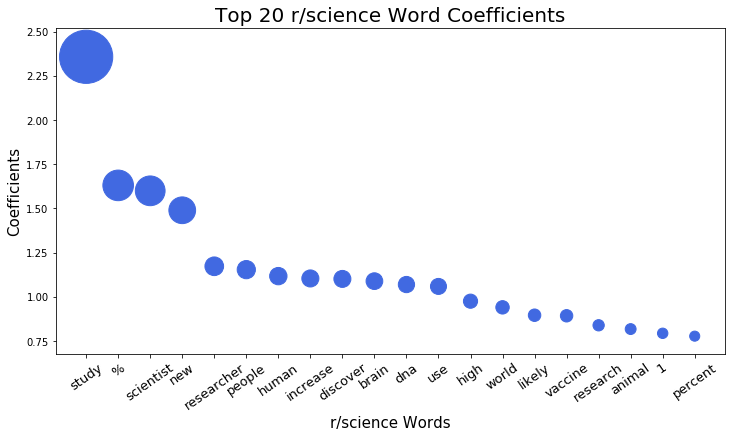

In [134]:
top_sci_words = cv_lg_df.sort_values(by=['coefficients'], ascending=False).head(20)

s = [(6*n)**3 for n in top_sci_words['coefficients']]
plt.figure(figsize=(12, 6))
plt.scatter(x = top_sci_words.index, y = top_sci_words['coefficients'], s=s, color='royalblue', alpha=1)
plt.title("Top 20 r/science Word Coefficients", fontsize = 20)
plt.ylabel("Coefficients", fontsize = 15)
plt.xlabel("r/science Words", fontsize = 15)
plt.xticks(fontsize=13, rotation = 35)
;

''

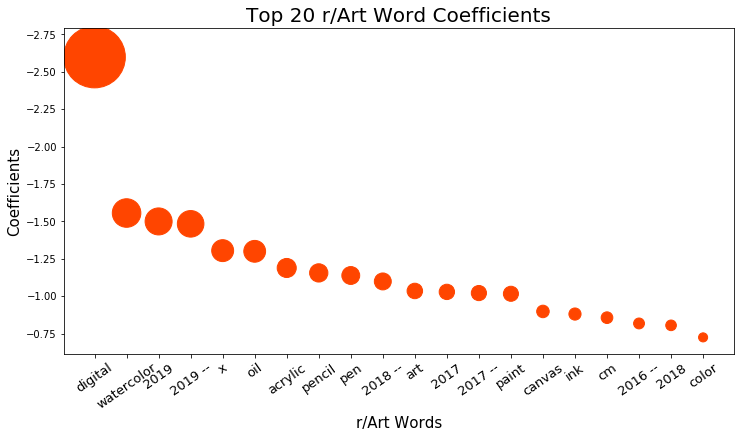

In [133]:
top_art_words = cv_lg_df.sort_values(by=['coefficients'], ascending=True).head(20)

s = [(-6*n)**3 for n in top_art_words['coefficients']]
plt.figure(figsize=(12, 6))
plt.scatter(x = top_art_words.index, y = top_art_words['coefficients'], s=s, color='orangered', alpha=1)
plt.title("Top 20 r/Art Word Coefficients", fontsize = 20)
plt.ylabel("Coefficients", fontsize = 15)
plt.xlabel("r/Art Words", fontsize = 15)
plt.xticks(fontsize=13, rotation = 35)
plt.gca().invert_yaxis()
;

<div class="alert alert-block alert-info">
I generated the top 20 words that appear frequently in the pipeline with a CountVectorizer and a Multinomial Naive Bayes model for both r/science and r/Art. I also calculated the top 20 words with the highest and lowest coefficients in the pipeline with a CountVectorizer and a LogisticRegression model. There was a lot of overlap of words within each subreddit between the two. I plotted the top words and their respective coefficients from the LogisticRegression model. For the r/Art Words Coefficients plot, I inverted the y-axis scale since the lowest negative coefficients meant more impact for r/Art classification. <br>    
    
"Study", "scientist", "vaccine", "discover", "brain", "dna", and "researcher" are words that jump out for r/science, as these terms all seem relevant to science. Based on the coefficient of 2.357438 for "study", the appearance of that word in a post would indicate an 91.4% chance that the post is from r/science. <br>

For r/Art, "digital", "watercolor", "oil", "paint", "pen", "acrylic", "pencil", "ink", "canvas", "paint", and "color" are all words related to the tools and mediums that artists use. Based on the coefficient of -2.6 for "digital", the appearance of that word in a post would indicate an 93.1% chance that the post is from r/Art.
</div>

### Confusion Matrix and Error Metrics

In [73]:
pred = pipe_cv_mnb.predict(X_test)

In [74]:
cm = confusion_matrix(y_test, pred)
cm_df = pd.DataFrame(cm, columns=['pred r/Art', 'pred r/science'], index=['actual r/Art', 'actual r/science'])
cm_df

,pred r/Art,pred r/science
actual r/Art,409,4
actual r/science,0,254


In [75]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       413
           1       0.98      1.00      0.99       254

    accuracy                           0.99       667
   macro avg       0.99      1.00      0.99       667
weighted avg       0.99      0.99      0.99       667



<div class="alert alert-block alert-info">
Using the CountVectorizer MultinomialNB pipeline, there were no type II errors (false negatives) where the model predicted a r/Art post that was actually a r/science one. There were 4 type I errors (false positives) where the model predicted a r/science post that was actually a r/Art one. <br>    
    
Since there were so no type II errors, the Sensitivity/Recall score was 100%. Since there were a low number of type I errors, it generated a precision score of 98%. 
</div>

## Conclusion

<div class="alert alert-block alert-info">
Below is a summary of steps to create a model that categorizes posts to a subreddit:
    
- Gather posts from target subreddits and combine into one dataset
- Clean the data and do preliminary EDA
- Utilize stemming, lemmatization, regex, and/or stop words to create clean tokens
- Choose transformers and models to use in a pipeline
- Gridsearch for optimal parameters to fit the pipeline
- Check the scores of the models
- Explore the features, create a Confusion Matrix, calculate error metrics and make adjustments to clean tokens if necessary

Following the 7 steps to build a model for post classification to a subreddit will lead to insights about each - the words that distinguish one sub against another, the kind of content found within the posts, and how redditors engage each forum. Utilizing this insight, Reddit can find new ways to foster the conversation between redditors and drive up user base engagement - whether that's through subreddit recommendations, post placement in multiple subreddits, or hashtag generation to link to other posts or trending topics.
<br>

#### Next Steps:

- Utilize regex to clean the tokens more thoroughly
- Investigate other models such as knn, decision trees, random forests, SVM, etc.
- Perform the same analysis on the comments section of the subreddit
- Explore the 4 posts that caused type I errors (one r/Art post that comes to mind is a digital artwork of Stephen Hawking)
</div>

Outside References:

- https://www.reddit.com/
- https://en.wikipedia.org/wiki/Reddit
- https://towardsdatascience.com/hacking-scikit-learns-vectorizers-9ef26a7170af
- https://spacy.io/
- https://stackoverflow.com/questions/24386489/adding-words-to-scikit-learns-countvectorizers-stop-list